In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


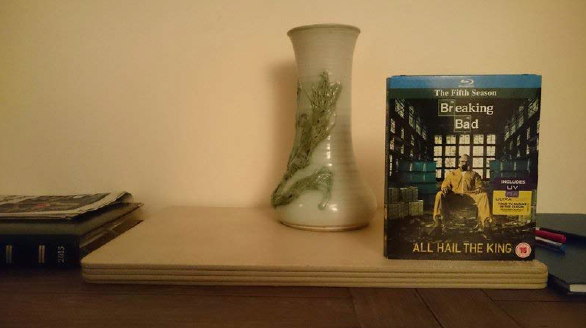

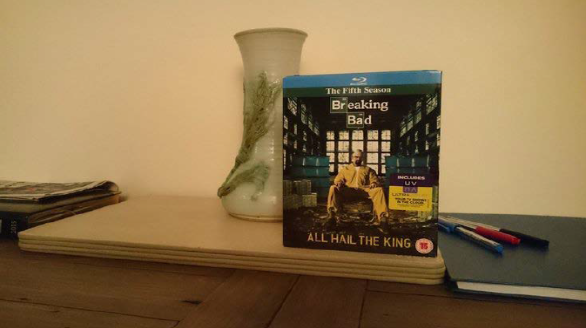

Computing disparity...


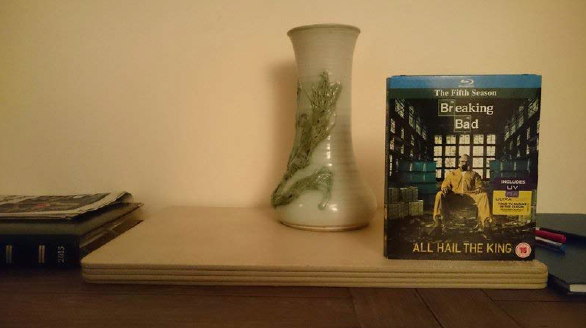

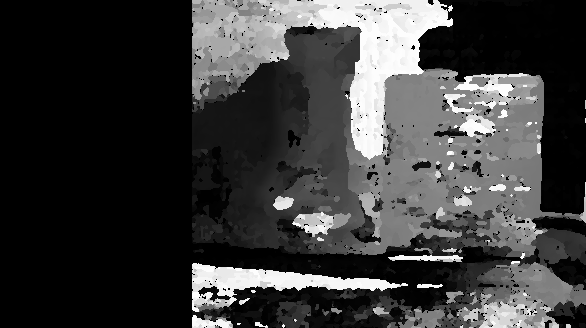

In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os


# تنظیمات اولیه
window_size = 5
min_disp = 16
num_disp = 192 - min_disp
blockSize = window_size
uniquenessRatio = 1
speckleRange = 3
speckleWindowSize = 3
disp12MaxDiff = 200
P1 = 600
P2 = 2400

pathL = '/content/drive/My Drive/images/imgL.png'
pathR = '/content/drive/My Drive/images/imgR.png'

# بارگذاری تصاویر
imgL = cv2.imread(pathL)
imgR = cv2.imread(pathR)

imgR = cv2.resize(imgR, (imgL.shape[1], imgL.shape[0]))

cv2_imshow(imgL)
cv2_imshow(imgR)

# ساخت مدل Stereo
stereo = cv2.StereoSGBM_create(
    minDisparity=min_disp,
    numDisparities=num_disp,
    blockSize=blockSize,
    uniquenessRatio=uniquenessRatio,
    speckleRange=speckleRange,
    speckleWindowSize=speckleWindowSize,
    disp12MaxDiff=disp12MaxDiff,
    P1=P1,
    P2=P2
)

# محاسبه disparity
print('Computing disparity...')
disp = stereo.compute(imgL, imgR).astype(np.float32) / 16.0

# نمایش نتایج
cv2_imshow(imgL)
disp_vis = (disp - min_disp) / num_disp * 255
disp_vis = np.uint8(np.clip(disp_vis, 0, 255))
cv2_imshow(disp_vis)
